In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io
import sys
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples                
sys.path.insert(0, caffe_root + 'python')
import caffe
from caffe.proto import caffe_pb2 
# iclude lib that's installed locally
sys.path.append('/n/shokuji/dd/cecilia/.local/lib/python2.6/site-packages/')
# import lmdb

plt.rcParams['figure.figsize'] = (12, 16)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os

# utility function: plot multiple images arranging in tiles.
def plot_images(images, tile_shape, cmap = cm.Greys_r):
    assert images.shape[0] <= (tile_shape[0]* tile_shape[1])
    from mpl_toolkits.axes_grid1 import ImageGrid
    fig = plt.figure()
    grid = ImageGrid(fig, 111,  nrows_ncols = tile_shape ) 
    for i in range(images.shape[0]):
        grd = grid[i]
        grd.imshow(images[i], cmap=cmap)

In [3]:
# load pre-trained model and the deploy file
caffe.set_mode_cpu()
net = caffe.Net(caffe_root + 'projects/sketchto3D/sketch_only_test.prototxt',
                caffe_root + 'projects/sketchto3D/caffemodel/sketch_only_iter_5000.caffemodel',
                caffe.TEST)

# dimentions of filters in the trained model
[(k,(v[0].data.shape, v[1].data.shape)) for k, v in net.params.items()]

#  The layer features and their shapes (1 is the batch size, corresponding to the single input image in this example).
[(k, v.data.shape) for k, v in net.blobs.items()]


[('label', (1, 1)),
 ('view1', (1, 1, 128, 128)),
 ('view_pair', (1, 1, 128, 128)),
 ('conv1', (1, 32, 116, 116)),
 ('pool1', (1, 32, 29, 29)),
 ('conv2', (1, 64, 23, 23)),
 ('pool2', (1, 64, 12, 12)),
 ('conv3', (1, 256, 10, 10)),
 ('pool3', (1, 256, 5, 5)),
 ('ip1', (1, 2048)),
 ('feat', (1, 64)),
 ('conv1_p', (1, 32, 116, 116)),
 ('pool1_p', (1, 32, 29, 29)),
 ('conv2_p', (1, 64, 23, 23)),
 ('pool2_p', (1, 64, 12, 12)),
 ('conv3_p', (1, 256, 10, 10)),
 ('pool3_p', (1, 256, 5, 5)),
 ('ip1_p', (1, 2048)),
 ('feat_p', (1, 64))]

In [23]:
# feed test data forward to get the feature vectors

num_data = 2700
feat_s1 = np.zeros((num_data, 64))
feat_s2 = np.zeros((num_data, 64))
feat_v1 = np.zeros((num_data, 64))
feat_v2 = np.zeros((num_data, 64))

sketch1 = np.zeros((num_data, 128, 128))
sketch2 = np.zeros((num_data, 128, 128))

view1 = np.zeros((num_data, 128, 128))
view2 = np.zeros((num_data, 128, 128))

for i in range (0, num_data):
    out = net.forward()
#     sketch1[i, :] = net.blobs['sketch1'].data[0]
#     sketch2[i, :] = net.blobs['sketch_pair'].data[0]
    view1[i, :] = net.blobs['view1'].data[0]
    view2[i, :] = net.blobs['view_pair'].data[0]
    
    feat_s1[i, :] = net.blobs['feat'].data[0]
    feat_s2[i, :] = net.blobs['feat_p'].data[0]
#     feat_v1[i, :] = net.blobs['feat_v'].data[0]
#     feat_v2[i, :] = net.blobs['feat_vp'].data[0]


In [44]:
featv1_sketch_only = feat_s1
featv2_sketch_only = feat_s2
np.save('./trained_feature/featv1_sketch_only.npy','featv1_sketch_only')
np.save('./trained_feature/featv2_sketch_only.npy','featv2_sketch_only')

In [45]:
np.save('./trained_feature/featv1_sketch_only.mat','featv1_sketch_only')
np.save('./trained_feature/featv2_sketch_only.mat','featv2_sketch_only')

In [25]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(feat_s1)
distances, indices = nbrs.kneighbors(feat_s2)

print indices
print distances

[[2687    6    3]
 [   3    6 1166]
 [2694 2685 1166]
 ..., 
 [1993 2328 2343]
 [2693 1150 1174]
 [2695 2699 1740]]
[[ 0.          0.83823398  0.83823398]
 [ 0.83854247  0.83854247  0.8403327 ]
 [ 0.          0.5892179   0.64382147]
 ..., 
 [ 0.889939    0.93505202  0.93505202]
 [ 0.          0.69372858  0.69372858]
 [ 0.61665378  0.66490519  0.80893605]]


[ 269 1094 2620]


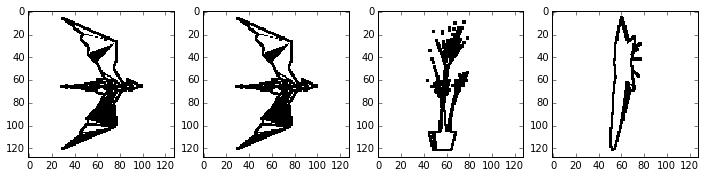

In [58]:
ind = 255
print indices[ind,:]
image1 = view2[ind,:]
image2 = view1[indices[ind,0],:]
image3 = view1[indices[ind,1],:]
image4 = view1[indices[ind,2],:]

plt.subplot(1,4,1)
plt.imshow(image1.transpose())
plt.subplot(1,4,2)
plt.imshow(image2.transpose())
plt.subplot(1,4,3)
plt.imshow(image3.transpose())
plt.subplot(1,4,4)
plt.imshow(image4.transpose())

In [3]:
import numpy as np
a = ((3,4,2,2))
np.save('a.npy','a')